In [13]:
ls data/LibriSpeech_train/

BOOKS.TXT        LICENSE.TXT      SPEAKERS.TXT
CHAPTERS.TXT     README.TXT       train-clean-100/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os


In [6]:
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd


# Read in text file with each word as a column

In [268]:
train_path = '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/'


my_cols = [str(i) for i in range(1000)] # create some col names
text_files = glob.glob(train_path + "/**/*.txt", recursive = True)  # get list of all text files in dir

df = pd.read_csv(text_files[1], 
                 sep=" ", 
                 names=my_cols, 
                 header=None)
df = df.set_index('0')
df = df.dropna(axis=1, how='all')
# DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)

In [153]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,,,,,,,,,,,,,,,,,,,,,
2412-153954-0000,SHORTLY,AFTER,PASSING,ONE,OF,THESE,CHAPELS,WE,CAME,SUDDENLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412-153954-0001,MY,GUIDES,HOWEVER,WERE,WELL,KNOWN,AND,THE,NATURAL,POLITENESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412-153954-0002,THE,STREETS,WERE,NARROW,AND,UNPAVED,BUT,VERY,FAIRLY,CLEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412-153954-0003,THE,VINE,GREW,OUTSIDE,MANY,OF,THE,HOUSES,AND,THERE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412-153954-0004,EVEN,ON,THIS,LEDGE,OF,HUMAN,SOCIETY,THERE,WAS,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Try reading json line by line

In [313]:
# count = 0

# with open(wav_file) as fp: 
#     while True: 
#         count += 1
#         line = fp.readline() 
  
#         if not line: 
#             break
#         print("Line{}: {}".format(count, line.strip()))
test_path = '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034/121119/1034-121119.trans.txt'
base_path = '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/'
        
with open(test_path) as f:
    content = f.readlines()
    idx =  [char[:16] for char in content]
    text = [letter[17:-1] for letter in content]
    idx = [base_path + index + '/.flacc' for index in idx]

idx[0:5]
# import json

# data = []
# with open(test_path) as f:
#     for line in f:
#         data.append(json.loads(line))
# data[0]

['/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034-121119-0000/.flacc',
 '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034-121119-0001/.flacc',
 '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034-121119-0002/.flacc',
 '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034-121119-0003/.flacc',
 '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1034-121119-0004/.flacc']

## Accessing the correct sound file from the dataframe

In [270]:
first_file = df.index[1] ## test file
first_file.split('-')
wav_file = os.path.join(train_path, first_file.split('-')[0], first_file.split('-')[1]) + '/' + first_file + '.flac'
wav_file


'/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1069/133699/1069-133699-0001.flac'

/usr/local/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


22050


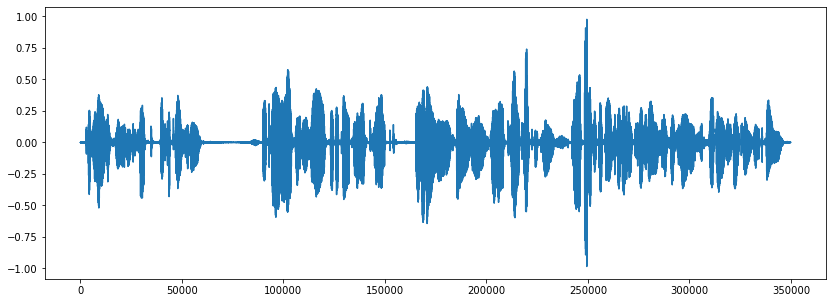

In [256]:
wav, sr = librosa.load(wav_file, mono=True)
print(sr)
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(wav)

In [150]:
ipd.Audio(data=wav,
          rate=sr)

## Loading data

In [15]:
def load_metadata_from_desc_file(file_path):
        """ Read metadata from a JSON-line file
            (possibly takes long, depending on the filesize)
        Params:
            file_path (str):  Path to a JSON-line file that contains labels and
                paths to the audio files
            partition (str): One of 'train', 'validation' or 'test'
        """
        audio_paths, durations, texts = [], [], []
        # append audio file path, duration of the audio, and text of the audio into these lists
        
        
        train_path = '/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/'

        #I think first we need to read data into dataframe to extract the key:

        my_cols = [str(i) for i in range(1000)] # create some col names
        text_files = glob.glob(train_path + "/**/*.txt", recursive = True)  # get list of all text files in dir

        ## Append to audio_paths, texts;
        for i in range(len(text_files)):
            ## read text line by line
            
            with open(test_path) as f:
                content = f.readlines()
                idx =  [char[:16] for char in content]
                text = [letter[17:-1] for letter in content]
                
                #append paths and texts
                audio_paths += idx
                texts += text
            
    
        
#         with open(file_path) as json_line_file:
#             for line_num, json_line in enumerate(json_line_file):
#                 try:
#                     spec = json.loads(json_line)
#                     if float(spec['duration']) > self.max_duration:
#                         continue
#                     audio_paths.append(spec['key'])
#                     durations.append(float(spec['duration']))
#                     texts.append(spec['text'])
#                 except Exception as e:
#                     # Change to (KeyError, ValueError) or
#                     # (KeyError,json.decoder.JSONDecodeError), depending on
#                     # json module version
#                     print('Error reading line #{}: {}'
#                                 .format(line_num, json_line))

In [52]:
def get_audio_and_text_data(base_path):
    text_files = glob.glob(base_path + "/**/*.txt", recursive = True)  # get list of all text files in dir
    audio_paths, durations, texts = [], [], []
    ## Append to audio_paths, texts;
    for i in range(len(text_files)):
        ## read text line by line

        with open(text_files[i]) as f:
            content = f.readlines()
            idx =  [char[:16] for char in content]            
            idx = [base_path + index[:4] + '/' + index[5:11] + '/' + index + '.flacc' for index in idx]

            text = [letter[17:-1] for letter in content]

            #append paths and texts
            audio_paths += idx
            texts += text
        
    return audio_paths, texts
        
a, b = get_audio_and_text_data('/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/')        
        

In [56]:
a[0]

'/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1069/133709/1069-133709-0000.flacc'

In [54]:
(len(audio_paths) - 29129 )/ 29129

NameError: name 'audio_paths' is not defined

In [55]:
audio_paths[12345], texts[12345]

NameError: name 'audio_paths' is not defined

## Begin pre preocession for neural net

### I think the first step would be to generate spectrograms?

In [197]:
# def spectrogram(signal, fft_length=256, sample_rate=2, hop_length=128):
#     window = np.hanning(fft_length)[:, None]
#     window_norm = np.sum(window**2)
    
    
#     scale = window_norm * sample_rate
    
#     trunc = (len(signal) - fft_length) % hop_length
#     x = signal[:len(signal) - trunc]
    
    
#     print(scale, window_norm, trunc, x)


In [184]:
spectrogram([0,1,2,3,3,3,3,4,5,6,7,8,9])

191.25 95.625 13 []


In [192]:
spec = librosa.feature.melspectrogram(wav, sr=sr)
spec.shape

(128, 420)

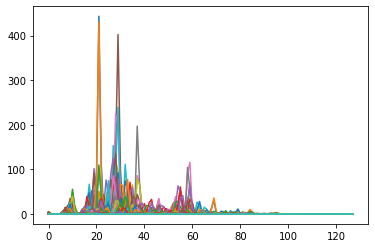

In [194]:
fig, ax = plt.subplots()
ax.plot(spec);

## This code taken from GitHub

In [18]:
from numpy.lib.stride_tricks import as_strided



def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):
    """
    Compute the spectrogram for a real signal.
    The parameters follow the naming convention of
    matplotlib.mlab.specgram
    Args:
        samples (1D array): input audio signal
        fft_length (int): number of elements in fft window
        sample_rate (scalar): sample rate
        hop_length (int): hop length (relative offset between neighboring
            fft windows).
    Returns:
        x (2D array): spectrogram [frequency x time]
        freq (1D array): frequency of each row in x
    Note:
        This is a truncating computation e.g. if fft_length=10,
        hop_length=5 and the signal has 23 elements, then the
        last 3 elements will be truncated.
    """
    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    # The scaling below follows the convention of
    # matplotlib.mlab.specgram which is the same as
    # matlabs specgram.
    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    # "stride trick" reshape to include overlap
    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    # window stride sanity check
    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])

    # broadcast window, compute fft over columns and square mod
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2

    # scale, 2.0 for everything except dc and fft_length/2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs



In [59]:
def spectrogram_from_file(filename, step=10, window=20, max_freq=None,
                          eps=1e-14):
    """ Calculate the log of linear spectrogram from FFT energy
    Params:
        filename (str): Path to the audio file
        step (int): Step size in milliseconds between windows
        window (int): FFT window size in milliseconds
        max_freq (int): Only FFT bins corresponding to frequencies between
            [0, max_freq] are returned
        eps (float): Small value to ensure numerical stability (for ln(x))
    """
    
    data, sample_rate = librosa.load(filename)

    if data.ndim >= 2:
        data = np.mean(data, 1)
    if max_freq is None:
        max_freq = sample_rate / 2
    if max_freq > sample_rate / 2:
        raise ValueError("max_freq must not be greater than half of "
                         " sample rate")
    if step > window:
        raise ValueError("step size must not be greater than window size")
    hop_length = int(0.001 * step * sample_rate)
    fft_length = int(0.001 * window * sample_rate)
    pxx, freqs = spectrogram(
        data, fft_length=fft_length, sample_rate=sample_rate,
        hop_length=hop_length)
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    return np.transpose(np.log(pxx[:ind, :] + eps))

In [50]:
# data, sample_rate = librosa.load(wav_file)

# spectrogram(data)

In [58]:
p = spectrogram_from_file('/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/data/LibriSpeech_train/train-clean-100/1069/133709/1069-133709-0000.flac')

# plot the normalized spectrogram
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
im = ax.imshow(vis_spectrogram_feature, cmap=plt.cm.jet, aspect='auto')
plt.title('Normalized Spectrogram')
plt.ylabel('Time')
plt.xlabel('Frequency')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.show()

/usr/local/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [258]:
p.shape

(1589, 221)

In [259]:
from keras.models import Model
from keras.layers import Input, GRU, Activation

In [260]:
def simple_rnn_model(input_dim, output_dim=29):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(output_dim, return_sequences=True, 
                 implementation=2, name='rnn')(input_data)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(simp_rnn)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

In [263]:
model_0 = simple_rnn_model(input_dim=161)


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 161)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 29)          16704     
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 16,704
Trainable params: 16,704
Non-trainable params: 0
_________________________________________________________________
None


In [227]:
import soundfile as sf
print(sf._libname)

/usr/local/anaconda3/bin/../lib/libsndfile.dylib


In [199]:
x, freq = spectrogram(wav)

In [201]:
x.shape, freq.shape

((129, 1678), (129,))

In [211]:
x.T.shape

(1678, 129)

In [209]:
freq

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [155]:
char_map_str = """
' 0
<SPACE> 1
a 2
b 3
c 4
d 5
e 6
f 7
g 8
h 9
i 10
j 11
k 12
l 13
m 14
n 15
o 16
p 17
q 18
r 19
s 20
t 21
u 22
v 23
w 24
x 25
y 26
z 27
"""
# the "blank" character is mapped to 28

char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)+1] = ch
index_map[2] = ' '

In [156]:
char_map

{"'": 0,
 '<SPACE>': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'j': 11,
 'k': 12,
 'l': 13,
 'm': 14,
 'n': 15,
 'o': 16,
 'p': 17,
 'q': 18,
 'r': 19,
 's': 20,
 't': 21,
 'u': 22,
 'v': 23,
 'w': 24,
 'x': 25,
 'y': 26,
 'z': 27}

In [222]:
file_id = first_file.split("-")
wav_path = train_path + os.path.join(*s)
wav_path

'/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection/LibriSpeech_train/train-clean-100/2412/153954/0000'

In [119]:
df.index[0]

'2412-153954-0000'

In [50]:
ls LibriSpeech/dev-clean/1272/128104

1272-128104-0000.flac  1272-128104-0006.flac  1272-128104-0012.flac
1272-128104-0001.flac  1272-128104-0007.flac  1272-128104-0013.flac
1272-128104-0002.flac  1272-128104-0008.flac  1272-128104-0014.flac
1272-128104-0003.flac  1272-128104-0009.flac  1272-128104.trans.txt
1272-128104-0004.flac  1272-128104-0010.flac
1272-128104-0005.flac  1272-128104-0011.flac


In [25]:
pwd

'/Users/joshbernd/Desktop/gal_notes/Capstone/Speech_Detection'

In [5]:
chapters.describe()

,ID,READER,MINUTES,PROJ.,BOOK ID
count,5831.000000,5831.000000,5831.000000,5831.000000,5.831000e+03
mean,115107.223975,4185.294975,10.107868,3767.777568,1.356390e+04
std,78535.499575,2676.347515,5.162287,2521.111277,4.812127e+04
min,1.000000,14.000000,0.050000,47.000000,1.000000e+00
25%,54051.000000,1700.000000,7.130000,1317.000000,1.734000e+03
50%,121449.000000,4153.000000,9.120000,3585.000000,6.005000e+03
75%,148992.500000,6540.000000,11.860000,5902.500000,1.908300e+04
max,305217.000000,9026.000000,30.260000,8645.000000,1.000012e+06


In [49]:
import os

for filename in os.listdir('LibriSpeech/dev-clean/'):        
    try:
        for file in os.listdir('LibriSpeech/dev-clean/' + filename):
    
            text_file = glob.glob('LibriSpeech/dev-clean/' + filename + '/' + file + '/*txt')
            print(text_file[0])
#             print('LibriSpeech/dev-clean/' + filename + file + '/*')
#             latest_file = max(list_of_files, key=os.path.getctime)
            text_ref = pd.read_csv(text_file[0], header=[['ref', 'word1']], delimiter=' ')
            break
    except Exception:
        pass
        
#     if filename.endswith(".asm") or filename.endswith(".py"): 
#          # print(os.path.join(directory, filename))
#         continue
#     else:
#         continue

LibriSpeech/dev-clean/2412/153954/2412-153954.trans.txt
LibriSpeech/dev-clean/2078/142845/2078-142845.trans.txt
LibriSpeech/dev-clean/3752/4943/3752-4943.trans.txt
LibriSpeech/dev-clean/1988/24833/1988-24833.trans.txt
LibriSpeech/dev-clean/1919/142785/1919-142785.trans.txt
LibriSpeech/dev-clean/3000/15664/3000-15664.trans.txt
LibriSpeech/dev-clean/1993/147965/1993-147965.trans.txt
LibriSpeech/dev-clean/6313/76958/6313-76958.trans.txt
LibriSpeech/dev-clean/251/136532/251-136532.trans.txt
LibriSpeech/dev-clean/8842/302201/8842-302201.trans.txt
LibriSpeech/dev-clean/5536/43358/5536-43358.trans.txt
LibriSpeech/dev-clean/7850/286674/7850-286674.trans.txt
LibriSpeech/dev-clean/174/168635/174-168635.trans.txt
LibriSpeech/dev-clean/6295/64301/6295-64301.trans.txt
LibriSpeech/dev-clean/7976/110124/7976-110124.trans.txt
LibriSpeech/dev-clean/2803/154320/2803-154320.trans.txt
LibriSpeech/dev-clean/777/126732/777-126732.trans.txt
LibriSpeech/dev-clean/5694/64038/5694-64038.trans.txt
LibriSpeech/de

In [50]:
text_ref.head()

,2035-147961-0000,PETER,TOLD,HIS,TROUBLES,TO,MISTER,SHIMERDA,HE,WAS,...,ON.2,HIS.1,PIGS,AND.1,HORSES,AND.2,EVEN,HIS.2,MILK,COW
0,2035-147961-0001,PETER,COULD,GIVE,NO,VERY,CLEAR,ACCOUNT,OF,HIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2035-147961-0002,SHE,ASKED,PETER,TO,WAIT,A,MOMENT,AND,WHEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2035-147961-0003,WE,LAY,STILL,AND,DID,NOT,TALK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2035-147961-0004,THE,LITTLE,HOUSE,ON,THE,HILLSIDE,WAS,SO,MUCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2035-147961-0005,THEY,MADE,ME,THINK,OF,DEFEATED,ARMIES,RETREATING,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
